# Сборный проект. Магазин компьютерных игр

---

## Описание проекта

Я работаю в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозирую ли я продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

_В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»._

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

_Данные за 2016 год могут быть неполными._

___


## Шаг 1. Открытие файла и общая информация

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
df_gaming = pd.read_csv('/datasets/games.csv')

df_gaming

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df_gaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



## Вывод

Данные открыты и изучены. Датафрейм содержит 16715 строк, при этом имена есть только у 16713 игр. Два имени пропали.

Мысли и идеи по предобработке:
- Year_of_Release- перевести в что-то надлежащее
- Есть много пропусков в оценках и рейтинге.
- Может быть, нужно как-то сравнять шкалы оценок пользователей и критиков (домножить или поделить на 10)
- Столбцы привести к нижнему регистру
- Жанры и платформы, может быть, тоже к нижнему регистру.

___

## Шаг 2. Предобработка

__Опустим регистры:__

In [4]:
df_gaming.columns = df_gaming.columns.str.lower() #опустили буквы в именах столбцов

In [5]:
df_gaming['platform'] = df_gaming['platform'].str.lower() #Опустим регистры платформ

In [6]:
df_gaming['genre'] = df_gaming['genre'].str.lower() #Опустим регистры платформ

__Пропуски:__

In [7]:
# посмотрим на пропуски в столбце жанров
df_gaming[df_gaming['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# Дропнем две строки. Тут нет ни имён, ни жанров.
df_gaming.dropna(subset = ['genre'], inplace = True)

In [9]:
# Так как в year_of_release хранится только год, заменим на тип данных на "целые", дропнув 270 NaNов. 
#Это не повлияет на выборку в силу малого числа удалённых строк.
# Целый тип данных пригодится при построении гистограмм в дальнейшем.
df_gaming.dropna(subset = ['year_of_release'], inplace = True)
# При сохранении только года через dt.year он возвращается к записи вида 2006.0. - неудобно и ни к чему

__Типы данных и немного про рейтинги:__

In [10]:
# Переводим в int
df_gaming['year_of_release'] = df_gaming['year_of_release'].astype('int') 

In [11]:
df_gaming[df_gaming['user_score'] == 'tbd'] # tbd - to be determined.
#Если у игры 2010 или 2005 года рейтинг to be determined, значит, он уже не будет determined. В принципе, это эквивалентно NaN.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [12]:
#Заменим на NaN.
df_gaming.loc[df_gaming['user_score'] == 'tbd', 'user_score'] = np.nan

# И переведём в числа, и домножим на 10, чтобы сравнивать с оценками критиков.
df_gaming['user_score'] = pd.to_numeric(df_gaming['user_score'])
df_gaming['user_score'] = df_gaming['user_score'] * 10

__Добавим суммарные продажи в отдельный столбец__

In [13]:
df_gaming['sum_sales'] = df_gaming['na_sales'] + df_gaming['eu_sales'] + df_gaming['jp_sales'] + df_gaming['other_sales']

__Посмотрим, что получилось__

In [14]:
df_gaming.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
8,New Super Mario Bros. Wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
9,Duck Hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [15]:
df_gaming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
sum_sales          16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Вывод

1) Опустил регистры там, где посчитал удобным и приемлимым: жанры, платформы и имена столбцов.

2) Дропнул в общей сложности 271 строчку: незначительная потеря в данных
- Две строчки, где не было имени игры и жанра
- Остальные не имели года выпуска игры

3) Заменил года релиза на int: пригодится в будущем для гистограмм.

4) 'tbd' в оценках пользователей - это "to be determined", "Будет определено". Проще говоря, оценки пока нет. И в этом датасете уже не появится. Заменил на NaN.

5) Привёл оценки пользователей и критиков к одной шкале: от одного до ста. Перед этим перевёл оценки пользователей в численный тип- был object из-за "tbd"

6) Посчитал суммарные продажи во всех регионах и записал в отдельный столбец

## Шаг 3. Исследовательский анализ данных

### 1) Сколько игр выпускалось в разные годы? Важны ли все года?

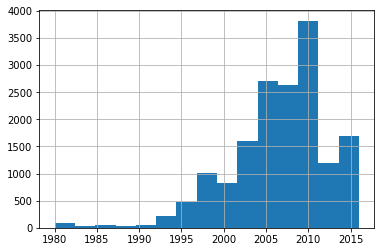

In [16]:
df_gaming['year_of_release'].hist(bins = 15)

In [17]:
gaming_years = df_gaming.groupby('year_of_release').agg({'name':'count'})

In [18]:
gaming_years.tail(15)

,name
year_of_release,
2002,829
2003,775
2004,762
2005,939
2006,1006
2007,1197
2008,1427
2009,1426
2010,1255


Исходя из гистограммы видно, что у игр сменилось поколение платформ- действительно, с 2011 года начали выходить консоли нового поколения https://afly.co/yfj2, что повлекло за собой старт появления новых игр- для обеспечения новых консолей. Поэтому в 2013 самое маленькое число продаж- игроделам нужно было время на разработку и портирование своих проектов, а на старые консоли смысл выпускать игры уменьшился.

_Я сократил ссылку на вики, чтобы она не была очень длинной. По ссылке информация про новое поколение платформ_

__Очевидно, имеет смысл рассматривать продажи с 2012 года. Более ранний период для нас не актуален__

### Микровывод

В среднем продажи игр, очевино, растут. Спад последних лет объясняется сменой поколений платформ и вообще небольшого изменения понимания игроками мира и рынка игр.

Нам имеет смысл для анализа смотреть на игры примерно с 2012 года- тогда появилось новое поколение платформ, игры на которые мы и собираемся продавать в 2017.

### 2)  Как менялись продажи по платформам.

__Платформы с наибольшими суммарными продажами:__

In [19]:
df_top_platforms = df_gaming.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False).head(10)

In [20]:
df_top_platforms.columns = ['rating_sales']

In [21]:
df_top_platforms

,rating_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Добавим данные в исходную таблицу в виде "рейтинга" платформ по продажам. Дали рейтинг только лучшим десяти платформам. Остальные дропнем.

In [22]:
df_gaming_rating = df_gaming.merge(df_top_platforms, on = 'platform', how = 'left')

In [23]:
df_gaming_rating.dropna(subset = ['rating_sales'], inplace = True) 

Создадим таблицу "Платформа: год выпуска игры"

In [24]:
df_years_platforms = df_gaming_rating.loc[:, ['platform', 'year_of_release']] #таблица платформа: год выхода игры

In [25]:
df_years_platforms

,platform,year_of_release
0,wii,2006
2,wii,2008
3,wii,2009
6,ds,2006
7,wii,2006
...,...,...
16437,gba,2002
16438,ps2,2008
16439,ps3,2016
16440,x360,2006


Построим гистограммы, чтобы приметить, сколько примерно длится подъём (то есть увеличение количества игр в год) и сколько всего "живёт" платформа.

Разбил 10 платформ на 3 гистограммы, чтобы их можно было читать.

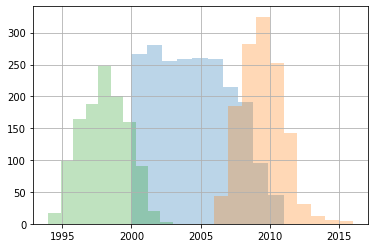

In [26]:
df_years_platforms.loc[df_years_platforms['platform'] == 'ps2', 'year_of_release'].hist(alpha = 0.3)
df_years_platforms.loc[df_years_platforms['platform'] == 'wii', 'year_of_release'].hist(alpha = 0.3)
df_years_platforms.loc[df_years_platforms['platform'] == 'ps', 'year_of_release'].hist(alpha = 0.3)



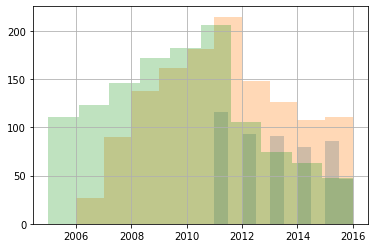

In [27]:
df_years_platforms.loc[df_years_platforms['platform'] == '3ds', 'year_of_release'].hist(alpha = 0.3)
df_years_platforms.loc[df_years_platforms['platform'] == 'ps3', 'year_of_release'].hist(alpha = 0.3)
df_years_platforms.loc[df_years_platforms['platform'] == 'x360', 'year_of_release'].hist(alpha = 0.3)


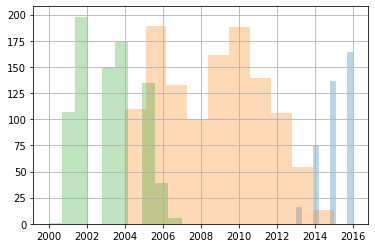

In [28]:
df_years_platforms.loc[df_years_platforms['platform'] == 'ps4', 'year_of_release'].hist(alpha = 0.3)
df_years_platforms.loc[df_years_platforms['platform'] == 'psp', 'year_of_release'].hist(alpha = 0.3)
df_years_platforms.loc[df_years_platforms['platform'] == 'gba', 'year_of_release'].hist(alpha = 0.3)
#df_years_platforms.loc[df_years_platforms['platform'] == 'ds', 'year_of_release'].hist(alpha = 0.3) 
#Гигантский ДС мешает смотреть на гистограмммы.

Исходя из графиков, можно сделать вывод, что платформа плодотворно живёт в среднем 6 лет: в этот период количество игр на неё растёт с каждым годом. Потом поколение обновляется и про предыдущее со временем забывают.

### Микровывод

Была создана таблица с топ-10 платформ по суммарным продажам, построены распределения по годам. Исходя из графиков видно, что характерный срок для роста и процветания платформы -  6 лет. Всего платформа живёт в среднем 10 лет.

### 3) Актуальный период

Раз платформа живёт 10 лет, при этом продажи растут в первые шесть лет жизни платформы, сконцентрируемся на таких платформах, первые игры которых вышли не позднее, чем 6 лет назад: то есть чтобы платформа либо была на пике, либо шла к нему.

In [29]:
# Посмотрим на данные от 2010 года:

df_actual = df_gaming.loc[df_gaming['year_of_release'] >= 2010]

In [30]:
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14,Kinect Adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,63.0,E,21.82
16,Grand Theft Auto V,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,x360,2013,action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
27,Pokemon Black/Pokemon White,ds,2010,role-playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [31]:
df_actual['platform'].unique() #какие платформы имеются в таблице

array(['x360', 'ps3', 'ds', 'ps4', '3ds', 'wii', 'xone', 'wiiu', 'pc',
       'psp', 'psv', 'ps2'], dtype=object)

__При этом нам не нужны платформы, которые "угасли" уже к 2014, например, psp. От них можно тоже избавиться...__

Добавим в "актуальную" таблицу данные о первом появлении платформы на рынке- столбец с годом выхода первой игры:

In [32]:
all_platforms = df_gaming.loc[:, ['platform', 'year_of_release']] #Таблица платформа: год выхода

In [33]:
df_gaming_firstyear = all_platforms.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'min')
#Находим минимальный год - то есть первый год

In [34]:
df_gaming_firstyear.columns = ['first_year_appear'] #Переименуем колонку, чтобы не было конфликта с актуальной таблицей

In [35]:
df_actual = df_actual.merge(df_gaming_firstyear, on = 'platform', how = 'left') #присоединяем

In [36]:
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,first_year_appear
0,Kinect Adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,63.0,E,21.82,2005
1,Grand Theft Auto V,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05,2006
2,Grand Theft Auto V,x360,2013,action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27,2005
3,Pokemon Black/Pokemon White,ds,2010,role-playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13,1985
4,Call of Duty: Modern Warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5272,Strawberry Nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011
5273,Aiyoku no Eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011
5274,Samurai Warriors: Sanada Maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2006
5275,Haitaka no Psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011


In [37]:
df_actual.loc[df_actual['name'] == 'Grand Theft Auto V'] 
# пример-пояснение: я хочу дропнуть версию игры на ps3 и x360, потому что эти приставки уже слишком старые.
# При этом pc дропать нельзя, потому что это концептуально другое устройство, которое обновляется пользователем.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,first_year_appear
1,Grand Theft Auto V,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05,2006
2,Grand Theft Auto V,x360,2013,action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27,2005
13,Grand Theft Auto V,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62,2013
58,Grand Theft Auto V,xone,2014,action,2.81,2.19,0.00,0.47,97.0,79.0,M,5.47,2013
487,Grand Theft Auto V,pc,2015,action,0.39,0.69,0.00,0.09,96.0,79.0,M,1.17,1985


In [38]:
df_actual = df_actual.query('~((first_year_appear < 2010) and (platform != "pc"))')
# оставляем строки, где год появления платформы >= 2011, оставляя при этом все игры на pc.

In [39]:
df_actual['platform'].unique()

array(['ps4', '3ds', 'xone', 'wiiu', 'pc', 'psv'], dtype=object)

In [40]:
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,first_year_appear
5,Call of Duty: Black Ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,2013
7,Pokemon X/Pokemon Y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60,2011
11,Mario Kart 7,3ds,2011,racing,5.03,4.02,2.69,0.91,85.0,82.0,E,12.65,2011
13,Grand Theft Auto V,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62,2013
14,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,STORM: Frontline Nation,pc,2011,strategy,0.00,0.01,0.00,0.00,60.0,72.0,E10+,0.01,1985
5272,Strawberry Nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011
5273,Aiyoku no Eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011
5275,Haitaka no Psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2011


### Микровывод

Актуальными, исходя из предыдущих двух исследований, можно считать игры за последние 6-10 лет, при этом если платформа вышла более 10 лет назад, её актуальность (и продажи игр на ней) стремительно падает. Отбросили все игры:
- выпущенные до 2010 года
- на устаревшие платформы (игры на которые выходили до 2010 года)

### 4) Какие платформы лидируют?

In [41]:
df_actual['platform'].nunique() # сколько у нас осталось актуальных платформ?

6

In [42]:
df_actual.pivot_table(index = 'platform', values = 'sum_sales').sort_values(by = 'sum_sales')

,sum_sales
platform,
psv,0.125431
pc,0.254614
3ds,0.503535
wiiu,0.559116
xone,0.645020
ps4,0.801378


Мы признали актуальными всего шесть платформ. Их и можно считать лидерами продаж. Посмотрим, на них внимательней.

In [43]:
sells_success = df_actual.pivot_table(index = 'platform', columns = 'year_of_release', values = 'sum_sales')

In [44]:
df_actual.pivot_table(index = 'platform', values = 'sum_sales').sort_values(by = 'sum_sales') # средние продажи за всё время

,sum_sales
platform,
psv,0.125431
pc,0.254614
3ds,0.503535
wiiu,0.559116
xone,0.645020
ps4,0.801378


Лидируют по продажам две главные консоли 8 поколения: ps4 и xone. Посмотрим на росты и падения.

In [45]:
sells_success # средние продажи по годам

year_of_release,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,
3ds,NaN,0.544828,0.552258,0.621648,0.547000,0.323023,0.329130
pc,0.269778,0.252014,0.380656,0.325789,0.282553,0.170400,0.097222
ps4,NaN,NaN,NaN,1.624375,1.333333,0.867883,0.422256
psv,NaN,0.257222,0.305472,0.168095,0.119000,0.056818,0.050000
wiiu,NaN,NaN,0.548750,0.515476,0.710645,0.583929,0.328571
xone,NaN,NaN,NaN,0.997895,0.886393,0.751750,0.300575


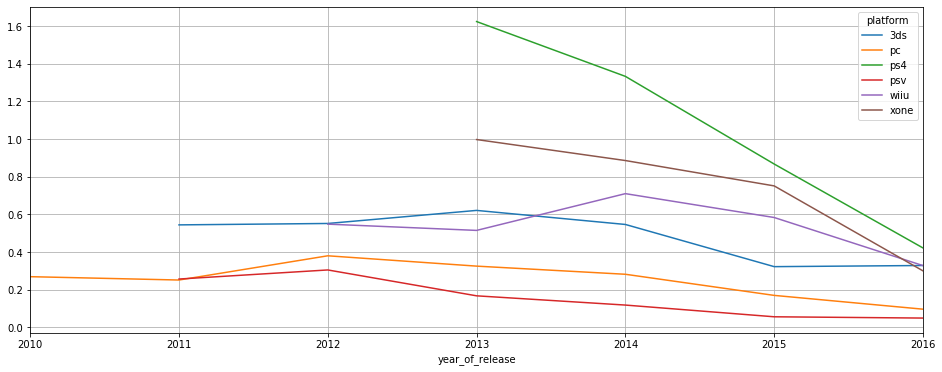

In [46]:
sells_success.T.plot(figsize = (16, 6), grid = True)

### Микровывод
Любопытно и логично: Средняя стоимость игры с выхода платформы падает. Ведь качество игр со временем перестаёт быть "передовым" на устаревающих платформах. Тем интересней наблюдать за падающей средней ценой игр на пк: возможно, это связано с наступлением эры приставок: их становится всё больше в домах у людей.

Лидером по средним продажам по годам является ps4. Удивительную стабильность показывает 3ds: японский рынок всё также таинственнен.

Ещё один вывод по графикам: скоро нас ждёт новое поколение платформ: видно по линиям продаж и предыдущим выводам.

### 5) Ящик с усами

Нужно, разбив по платформам актуальный датасет, построить ящики с усами. Продажи игр и будут значениями в ящике:

__3ds__

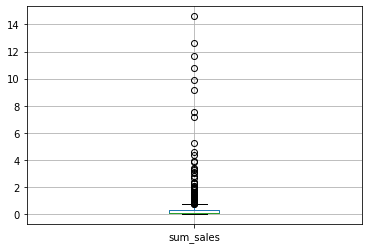

In [47]:
df_actual.loc[df_actual['platform'] == "3ds"].boxplot(column = 'sum_sales')

__pc__

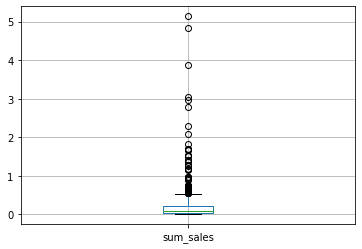

In [48]:
df_actual.loc[df_actual['platform'] == "pc"].boxplot(column = 'sum_sales')

__ps4__

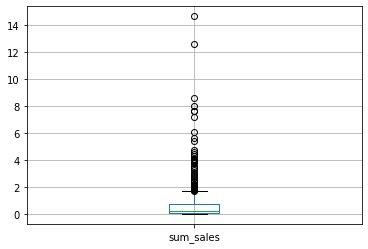

In [49]:
df_actual.loc[df_actual['platform'] == "ps4"].boxplot(column = 'sum_sales')

__psv__

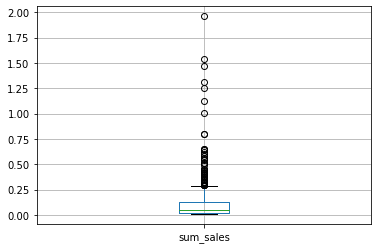

In [50]:
df_actual.loc[df_actual['platform'] == "psv"].boxplot(column = 'sum_sales')

__wiiu__

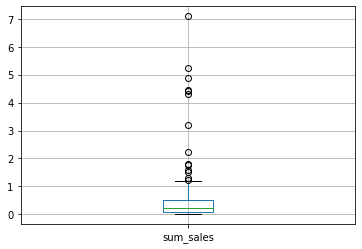

In [51]:
df_actual.loc[df_actual['platform'] == "wiiu"].boxplot(column = 'sum_sales')

__xone__

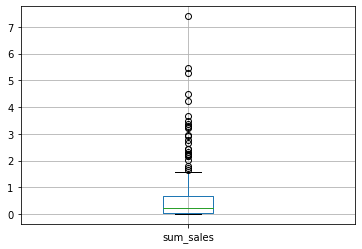

In [52]:
df_actual.loc[df_actual['platform'] == "xone"].boxplot(column = 'sum_sales')

### Микровывод

- Разница в продажах между платформами заметна, на глаза попадаются явные лидеры по медианной цене игр и по междуквартильному расстоянию: это платформы xone и ps4.
- Самая маленькая медианная прибыль с игр у платформ 3ds, pc и psv. Что можно обьяснить: На 3ds и psv - это "ручные" приставки, которые можно носить с собой. Поэтому игры на них попроще и, как следствие, дешевле.
- А pc- вообще особенное пространство для игр: игру на компьютере может сделать любой, следовательно, медианная цена на такие игры будет ниже.
- На ps4, xone, 3ds и pc есть гигантские значения в районе 10 миллионов долларов: это "крупные" игры, которые любимы публикой. Выбросами это назвать невозможно.

### 6) Продажи внутри одной популярной платформы

Возьмём для рассмотра ps4: самую успешную платформу на данный момент.

__Критики__

In [53]:
df_ps4 = df_actual.loc[df_actual['platform'] == "ps4"]

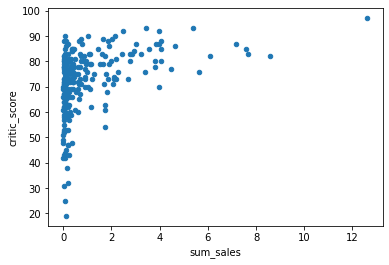

In [54]:
df_ps4.plot(x='sum_sales', y='critic_score', kind='scatter')

In [55]:
print('Корреляция между отзывами критиков и продажами:', df_ps4['critic_score'].corr(df_ps4['sum_sales']))

Корреляция между отзывами критиков и продажами: 0.40656790206178095


Можно сказать, что если у игры великолепные, продажи у игры более вероятно высокие. Но явной зависимости нет: корреляция лишь 0.4.

__Пользователи__

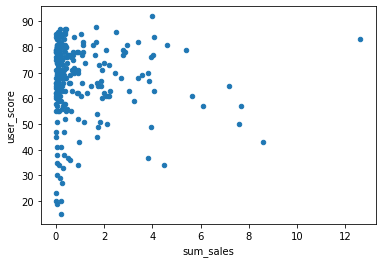

In [56]:
df_ps4.plot(x='sum_sales', y='user_score', kind='scatter')

In [57]:
print('Корреляция между отзывами пользователей и продажами:', df_ps4['user_score'].corr(df_ps4['sum_sales']))

Корреляция между отзывами пользователей и продажами: -0.031957110204556445


Оценки пользователей остаются загадкой как для продавцов игр, так и для самих пользователей, видимо. Связи между значениями практически не прослеживается. Корреляция - 0.03

### Микровывод

Если критики ставят хорошую оценку, можно ждать, что игра продаётся неплохо. Но настоящей зависимости тут проследить нельзя. (корреляция 0.4)

А вот связи между оценками простых игроков и продажами игры нет никакой: кто ни разу не ставил крепкую десятку инди-игре, сделанной за 14 дней в подвале? (Корреляция 0.03)

__Соотнеся выводы с продажами игр на других платформах__:

__pc__

In [58]:
df_pc = df_actual.loc[df_actual['platform'] == "pc"]
print('Корреляция между отзывами критиков и продажами:', df_pc['critic_score'].corr(df_pc['sum_sales']))
print('Корреляция между отзывами пользователей и продажами:', df_pc['user_score'].corr(df_pc['sum_sales']))

Корреляция между отзывами критиков и продажами: 0.3364970713018004
Корреляция между отзывами пользователей и продажами: -0.011087149662822532


__3ds__

In [59]:
df_3ds = df_actual.loc[df_actual['platform'] == "3ds"]
print('Корреляция между отзывами критиков и продажами:', df_3ds['critic_score'].corr(df_3ds['sum_sales']))
print('Корреляция между отзывами пользователей и продажами:', df_3ds['user_score'].corr(df_3ds['sum_sales']))

Корреляция между отзывами критиков и продажами: 0.3487397305984834
Корреляция между отзывами пользователей и продажами: 0.22207843643390882


__wiiu__

In [60]:
df_wiiu = df_actual.loc[df_actual['platform'] == "wiiu"]
print('Корреляция между отзывами критиков и продажами:', df_wiiu['critic_score'].corr(df_wiiu['sum_sales']))
print('Корреляция между отзывами пользователей и продажами:', df_wiiu['user_score'].corr(df_wiiu['sum_sales']))

Корреляция между отзывами критиков и продажами: 0.34837976012017485
Корреляция между отзывами пользователей и продажами: 0.4002190202148618


__xone__

In [61]:
df_xone = df_actual.loc[df_actual['platform'] == "xone"]
print('Корреляция между отзывами критиков и продажами:', df_xone['critic_score'].corr(df_xone['sum_sales']))
print('Корреляция между отзывами пользователей и продажами:', df_xone['user_score'].corr(df_xone['sum_sales']))

Корреляция между отзывами критиков и продажами: 0.4169983280084017
Корреляция между отзывами пользователей и продажами: -0.06892505328279411


__psv__

In [62]:
df_psv = df_actual.loc[df_actual['platform'] == "psv"]
print('Корреляция между отзывами критиков и продажами:', df_psv['critic_score'].corr(df_psv['sum_sales']))
print('Корреляция между отзывами пользователей и продажами:', df_psv['user_score'].corr(df_psv['sum_sales']))

Корреляция между отзывами критиков и продажами: 0.13176292727608935
Корреляция между отзывами пользователей и продажами: 0.013488756835886512


__Можно опять заметить__, что рынок наиболее "японских" платформ, то есть wiiu и 3ds, ведёт себя совсем не так, как "западные" партнёры:

- wiiu: корреляция продаж с критиками 0.35, с пользователями 0.4
- 3ds: корреляция продаж с критиками 0.34, с пользователями 0.22

Похоже, что японские пользователи более разборчивы.

### 7) Посмотрите на распределение игр по жанрам.

_Опять таки, будем рассматривать только актуальный период и платформы (df_actual)_

Создадим таблицу с количеством игр определённого жанра и средними продажами игры каждого жанра:

In [63]:
df_genres = df_actual.loc[:, ['genre', 'sum_sales']]

In [64]:
df_genres.groupby('genre').agg({'genre':'count', 'sum_sales':'mean'})

,genre,sum_sales
genre,,
action,733,0.339673
adventure,208,0.095577
fighting,64,0.479375
misc,150,0.296067
platform,77,0.851429
puzzle,43,0.180000
racing,96,0.519583
role-playing,297,0.563232
shooter,174,1.062989


### Микровывод

- Самые частые жанры в наше время: __action__ (733 игры), __role-playing__ (297 игр) и __adventure__ (208 игр)

- По продажам лидируют: __shooter__ (1.06 млн), __platform__ (0.85 млн) и __sports__ (0.61 млн)

Можно сделать вывод, что предпочтение разработчиками определённых жанров не обязательно вызвано желанием заработать: иначе шутеров и спортивных игр выпускали бы больше, чем экшнов и ролевых игр

## Вывод

После обьёмного исследовательского анализа можно сказать, что:

1) В среднем продажи игр, очевино, растут. Спад последних лет объясняется сменой поколений платформ и вообще небольшого изменения понимания игроками мира и рынка игр. Нам имеет смысл для анализа смотреть на игры примерно с 2012 года- тогда появилось новое поколение платформ, игры на которые мы и собираемся продавать в 2017.

2) Исходя из графиков видно, что характерный срок для роста и процветания платформы - 6 лет. Всего платформа живёт в среднем 10 лет.

3) Актуальными, исходя из предыдущих двух исследований, можно считать игры за последние 6-10 лет, при этом если платформа вышла более 10 лет назад, её актуальность (и продажи игр на ней) стремительно падает. Отбросили все игры:
- выпущенные до 2010 года
- на устаревшие платформы (игры на которые выходили до 2010 года)

4) Любопытно и логично: Средняя стоимость игры с выхода платформы падает. Ведь качество игр со временем перестаёт быть "передовым" на устаревающих платформах. Тем интересней наблюдать за падающей средней ценой игр на пк: возможно, это связано с наступлением эры приставок: их становится всё больше в домах у людей.

Лидером по средним продажам по годам является ps4. Удивительную стабильность показывает 3ds: японский рынок всё также таинственнен.

_Ещё один вывод по графикам: скоро нас ждёт новое поколение платформ: видно по линиям продаж и предыдущим выводам._

5) Построли ящик с усами для продаж игр на каждой актуальной платформе:
- Разница в продажах между платформами заметна, на глаза попадаются явные лидеры по медианной цене игр и по междуквартильному расстоянию: это платформы xone и ps4.
- Самая маленькая медианная прибыль с игр у платформ 3ds, pc и psv. Что можно обьяснить: На 3ds и psv - это "ручные" приставки, которые можно носить с собой. Поэтому игры на них попроще и, как следствие, дешевле.
- А pc- вообще особенное пространство для игр: игру на компьютере может сделать любой, следовательно, медианная цена на такие игры будет ниже.
- На ps4, xone, 3ds и pc есть гигантские значения в районе 10 миллионов долларов: это "крупные" игры, которые любимы публикой. Выбросами это назвать невозможно.

6) Взяли для примера ps4 и рассмотрели её поближе:
- Если критики ставят хорошую оценку, можно ждать, что игра продаётся неплохо. Но настоящей зависимости тут проследить нельзя. (корреляция 0.4)
- А вот связи между оценками простых игроков и продажами игры нет никакой: кто ни разу не ставил крепкую десятку инди-игре, сделанной за 14 дней в подвале? (Корреляция 0.03)

_Затем соотнесли это с остальными платформами: оказалось, что такие японские платформы, как 3ds и wiiu, ведут себя совершенно иначе: высокие оценки пользователей этих приставок гораздо чаще говорят и о хороших продажах игры_

7) Можно сделать вывод, что предпочтение разработчиками определённых жанров не обязательно вызвано желанием заработать: иначе шутеров и спортивных игр выпускали бы больше, чем экшнов и ролевых игр.

__Более подробно- в самих шагах, в пунктах "микровывод".__

___

## Шаг 4. Портрет пользователя каждого региона

### 1) Платформы: топ-5 в каждом регионе

Лучше считать медианные продажи, чтобы защититься от "больших" игр и инди-поделок.

__Северная америка__

In [65]:
df_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'median').sort_values(by = 'na_sales', ascending = False).head(5)

,na_sales
platform,
xone,0.12
wiiu,0.11
ps4,0.06
3ds,0.01
pc,0.00


Патриотизм остаётся патриотизмом и при выборе платформы: на первом месте xbox one. Сразу за ним- wiiu.

__Япония__

In [66]:
df_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'median').sort_values(by = 'jp_sales', ascending = False).head(5)

,jp_sales
platform,
3ds,0.05
psv,0.03
ps4,0.01
pc,0.00
wiiu,0.00


Патриотизм присущ и японцам: первые три места- японские платформы. В конце почему-то wiiu, так понравившаяся американцам.

__Европа__

In [67]:
df_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'median').sort_values(by = 'eu_sales', ascending = False).head(5)

,eu_sales
platform,
ps4,0.08
wiiu,0.07
xone,0.07
pc,0.05
3ds,0.00


У европейцев "своей" фирмы-производителя на современном рынке нет, но лучше всего ведёт себя ps4. Однако разброс от xone и wiiu невелик.Любопытно, что именно европейцы ценят ПК-гейминг- у них единственных аж 0.05 млн величина медианных продаж на pc.

### Микровывод

Завидно высокое место во всех регионах (Топ-3) занимает ps4.

В Японии совершенно не котируется американская приставка xone, а лучше всего продаются игры на 3ds- портативную платформу, в которую можно играть где угодно.

В Северной Америке на первом месте xone. Патриотизм превыше всего, плюс, приставка делалась американцами, которые знают, что нужно землякам.

В Европе платформы слегка перемешались: ещё интересней, что на втором месте находится платформа wiiu, очень необычная своим ассортиментом.



### 2) Жанры: Топ-5 в каждом регионе

Опять же, считать буду медианные продажи.

__США__

In [68]:
df_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'median').sort_values(by = 'na_sales', ascending = False).head(5)

,na_sales
genre,
shooter,0.135
platform,0.090
fighting,0.050
sports,0.050
racing,0.030


Шутеры уверенно забирают первую строчку в США! Неудивительно на родине шедевров вроде Call Of Duty и Battlefield.

__Япония__

In [69]:
df_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'median').sort_values(by = 'jp_sales', ascending = False).head(5)

,jp_sales
genre,
role-playing,0.050
fighting,0.025
misc,0.020
adventure,0.010
action,0.000


Ролевые игры, файтинги, приключения- вот Сфера наибольших интересов японских пользователей.

__Европа__

In [70]:
df_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'median').sort_values(by = 'eu_sales', ascending = False).head(5)

,eu_sales
genre,
shooter,0.15
platform,0.08
racing,0.07
sports,0.05
fighting,0.04


Топ-5 очень похож на американский. Несмотря на разные предпочтения по платформам, вкусы по играм у американцев и европейцев одинаковые.

### Микровывод

Японские игроки предпочитают ролевые игры и файтинги.

Европа и США ведут себя практически одинаково, предпочитая шутеры и спортивные игры.

### 3) Влияет ли возрастной рейтинг на продажи в отдельном регионе?

Посмотрим на примере США. Если значения медианных продаж по рейтингам будут примерно равны, не влияет.

In [71]:
df_actual.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'median')

,na_sales
rating,
E,0.060
E10+,0.090
EC,0.045
M,0.100
RP,0.000
T,0.030


Для начала, уясним, что же это за рейтинги. Рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов. 

https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board
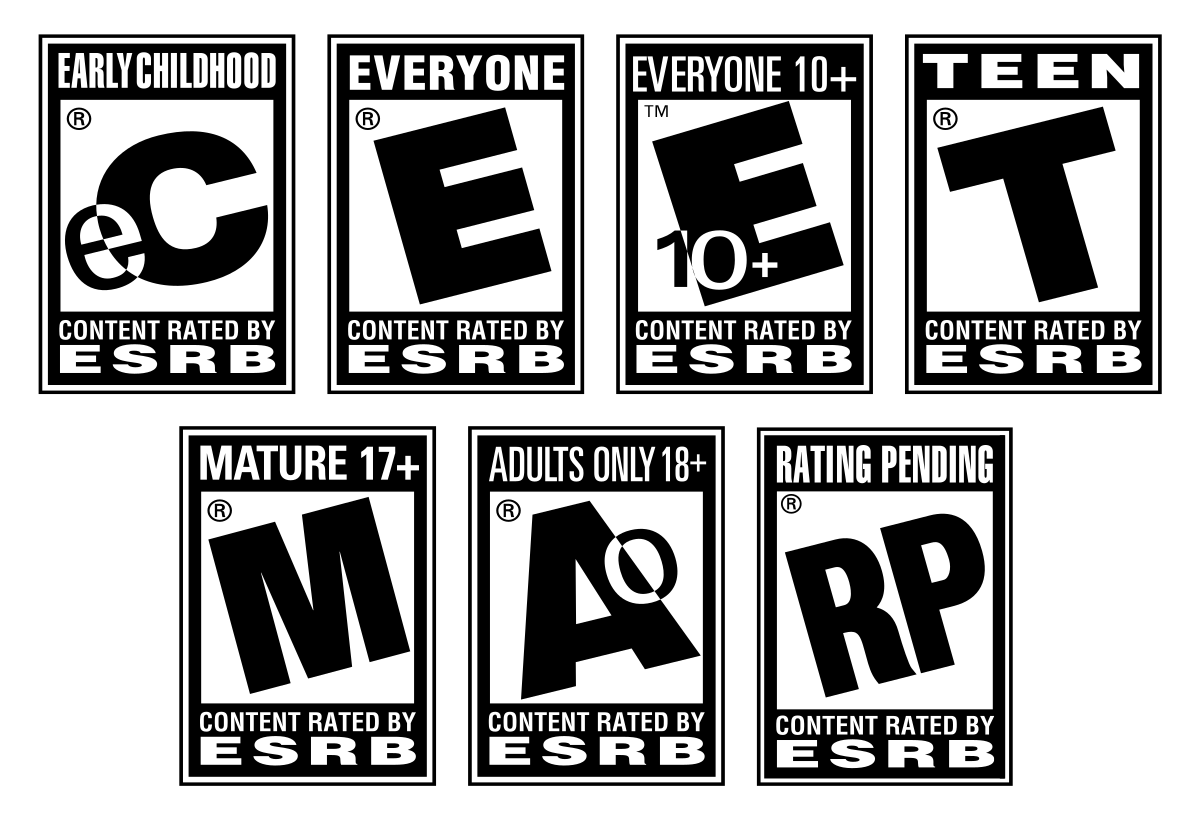

Итак, рейтинги влияют на продажи игры. Так, лучше всего продаётся игра с рейтингом Е10+. То есть __"Для всех от 10 лет и старше"__

На втором месте рейтинг Е, __Для всех__

### Микровывод
Игры "Для всех" и покупают лучше всего. Больше и не скажешь.

## Вывод

Составив портреты пользователей, можно сказать:

1) По платформам:

- Завидно высокое место во всех регионах (Топ-3) занимает ps4.

- В Японии совершенно не котируется американская приставка xone, а лучше всего продаются игры на 3ds- портативную платформу, в которую можно играть где угодно.

- В Северной Америке на первом месте xone. Патриотизм превыше всего, плюс, приставка делалась американцами, которые знают, что нужно землякам.

- В Европе платформы слегка перемешались: ещё интересней, что на втором месте находится платформа wiiu, очень необычная своим ассортиментом.
 
2) По жанрам:

- Японские игроки предпочитают ролевые игры и файтинги.

- Европа и США ведут себя практически одинаково, предпочитая шутеры и спортивные игры.

3) Возрастные рейтинги влияют на продажи игры. Лучше всех продаются игры с пометкой "Для всех".

___

## Шаг 5. Гипотезы

Сначала дропнем все NaN в строчках user_score. Иначе st.test_ind() не покажет уровень значимости.

In [72]:
df_users = df_actual

In [73]:
df_users.dropna(subset = ['user_score'], inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза Ho - средние пользовательские рейтинги платформ одинаковые, альтернативная H1- разные.

In [74]:
one_x = df_users.loc[df_users['platform'] == 'xone', 'user_score']
portable_comp = df_users.loc[df_users['platform'] == 'pc', 'user_score']
#Создали совокупности

Посмотрим, равны ли дисперсии.

In [75]:
one_x.describe()

count    182.000000
mean      65.214286
std       13.809406
min       16.000000
25%       58.000000
50%       68.000000
75%       75.000000
max       92.000000
Name: user_score, dtype: float64

In [76]:
portable_comp.describe()

count    374.000000
mean      65.181818
std       15.653901
min       14.000000
25%       56.000000
50%       68.000000
75%       77.000000
max       93.000000
Name: user_score, dtype: float64

In [77]:
results = st.ttest_ind(
one_x,
portable_comp, equal_var = False) #стандартные отклонения: 13.8 у xone и 15.6 у pc, дисперсии не равны.
print('p-значение: ', results.pvalue)

p-значение:  0.9801634129117981


In [84]:
#Введём 
alpha = 0.01
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средняя оценка игр xone', df_users.loc[df_users['platform'] == 'xone', 'user_score'].mean())
print('Средняя оценка у pc', df_users.loc[df_users['platform'] == 'pc', 'user_score'].mean())

Отвергаем нулевую гипотезу
Средняя оценка игр xone 65.21428571428571
Средняя оценка у pc 65.18181818181819


Действительно, средние выручки практически равны. Нулевую гипотезу "Средние рейтинги одинаковы" отвергнуть невозможно.

### Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Нулевая гипотеза Ho- средние пользовательские рейтинги одинаковые. Проверим.

In [79]:
action_df = df_users.loc[df_users['genre'] == 'action', 'user_score']
sports_df = df_users.loc[df_users['genre'] == 'sports', 'user_score']
#Создали совокупности

In [80]:
# Посмотрим, равны ли дисперсии:
action_df.describe()

count    392.000000
mean      68.119898
std       13.487075
min       20.000000
25%       61.000000
50%       71.000000
75%       78.000000
max       90.000000
Name: user_score, dtype: float64

In [82]:
sports_df.describe() #Стандартные отклонения равны 13.4 и 16.3. Дисперсии не равны.

count    124.000000
mean      57.733871
std       16.347899
min       14.000000
25%       49.750000
50%       60.000000
75%       69.250000
max       88.000000
Name: user_score, dtype: float64

In [83]:
results = st.ttest_ind(
sports_df,
action_df, equal_var = False) #Стандартные отклонения равны 13.4 и 16.3. Дисперсии не равны.
print('p-значение: ', results.pvalue)

p-значение:  1.2025577414903395e-09


In [85]:
#Введём 
alpha = 0.01
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средняя оценка у action', df_users.loc[df_users['genre'] == 'action', 'user_score'].mean())
print('Средняя оценка у sports', df_users.loc[df_users['genre'] == 'sports', 'user_score'].mean())

Отвергаем нулевую гипотезу
Средняя оценка у action 68.11989795918367
Средняя оценка у sports 57.733870967741936


Уровень значимости крайне мал, нулевую гипотезу "средние пользовательские оценки SPORTS и ACTION одинаковы" отвергаем.

Значит, не можем отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

## Вывод

Установили alpha = 0.01

__Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые__

- Действительно, средние выручки практически равны, а уровень значимости велик. Нулевую гипотезу "Средние рейтинги одинаковы" отвергнуть невозможно.

__Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные__

- Уровень значимости крайне мал, нулевую гипотезу "средние пользовательские оценки SPORTS и ACTION одинаковы" отвергаем. Значит, не можем отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

___

## Шаг 6. Общий вывод

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозирую ли я продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

### 1) Данные были открыты и изучены. Датафрейм содержит 16715 строк, при этом имена есть только у 16713 игр. Два имени пропали.

### 2) Предобработка данных:

А) Опустил регистры там, где посчитал удобным и приемлимым: жанры, платформы и имена столбцов.

Б) Дропнул в общей сложности 271 строчку: незначительная потеря в данных

- Две строчки, где не было имени игры и жанра
- Остальные не имели года выпуска игры

В) Заменил года релиза на int: пригодится в будущем для гистограмм.

Г) 'tbd' в оценках пользователей - это "to be determined", "Будет определено". Проще говоря, оценки пока нет. И в этом датасете уже не появится. Заменил на NaN.

Д) Привёл оценки пользователей и критиков к одной шкале: от одного до ста. Перед этим перевёл оценки пользователей в численный тип- был object из-за "tbd"

Е) Посчитал суммарные продажи во всех регионах и записал в отдельный столбец

### 3) Исследовательский анализ:

После обьёмного исследовательского анализа можно сказать, что:

А) В среднем продажи игр, очевино, растут. Спад последних лет объясняется сменой поколений платформ и вообще небольшого изменения понимания игроками мира и рынка игр. Нам имеет смысл для анализа смотреть на игры примерно с 2012 года- тогда появилось новое поколение платформ, игры на которые мы и собираемся продавать в 2017.

Б) Исходя из графиков видно, что характерный срок для роста и процветания платформы - 6 лет. Всего платформа живёт в среднем 10 лет.

В) Актуальными, исходя из предыдущих двух исследований, можно считать игры за последние 6-10 лет, при этом если платформа вышла более 10 лет назад, её актуальность (и продажи игр на ней) стремительно падает. Отбросили все игры:

- выпущенные до 2010 года
- на устаревшие платформы (игры на которые выходили до 2010 года)

Г) Любопытно и логично: Средняя стоимость игры с выхода платформы падает. Ведь качество игр со временем перестаёт быть "передовым" на устаревающих платформах. Тем интересней наблюдать за падающей средней ценой игр на пк: возможно, это связано с наступлением эры приставок: их становится всё больше в домах у людей.

- Лидером по средним продажам по годам является ps4. Удивительную стабильность показывает 3ds: японский рынок всё также таинственнен.

_Ещё один вывод по графикам: скоро нас ждёт новое поколение платформ: видно по линиям продаж и предыдущим выводам._

Д) Построли ящик с усами для продаж игр на каждой актуальной платформе:

- Разница в продажах между платформами заметна, на глаза попадаются явные лидеры по медианной цене игр и по междуквартильному расстоянию: это платформы xone и ps4.
- Самая маленькая медианная прибыль с игр у платформ 3ds, pc и psv. Что можно обьяснить: На 3ds и psv - это "ручные" приставки, которые можно носить с собой. Поэтому игры на них попроще и, как следствие, дешевле.
- А pc- вообще особенное пространство для игр: игру на компьютере может сделать любой, следовательно, медианная цена на такие игры будет ниже.
- На ps4, xone, 3ds и pc есть гигантские значения в районе 10 миллионов долларов: это "крупные" игры, которые любимы публикой. Выбросами это назвать невозможно.

Е) Взяли для примера ps4 и рассмотрели её поближе:

- Если критики ставят хорошую оценку, можно ждать, что игра продаётся неплохо. Но настоящей зависимости тут проследить нельзя. (корреляция 0.4)
- А вот связи между оценками простых игроков и продажами игры нет никакой: кто ни разу не ставил крепкую десятку инди-игре, сделанной за 14 дней в подвале? (Корреляция 0.03)
- Затем соотнесли это с остальными платформами: оказалось, что такие японские платформы, как 3ds и wiiu, ведут себя совершенно иначе: высокие оценки пользователей этих приставок гораздо чаще говорят и о хороших продажах игры

Ж) Можно сделать вывод, что предпочтение разработчиками определённых жанров не обязательно вызвано желанием заработать: иначе шутеров и спортивных игр выпускали бы больше, чем экшнов и ролевых игр.

### 4) Портреты пользователей

Составив портреты пользователей, можно сказать:

А) По платформам:

- Завидно высокое место во всех регионах (Топ-3) занимает ps4.

- В Японии совершенно не котируется американская приставка xone, а лучше всего продаются игры на 3ds- портативную платформу, в которую можно играть где угодно.

- В Северной Америке на первом месте xone. Патриотизм превыше всего, плюс, приставка делалась американцами, которые знают, что нужно землякам.

- В Европе платформы слегка перемешались: ещё интересней, что на втором месте находится платформа wiiu, очень необычная своим ассортиментом.

Б) По жанрам:

- Японские игроки предпочитают ролевые игры и файтинги.

- Европа и США ведут себя практически одинаково, предпочитая шутеры и спортивные игры.

В) Возрастные рейтинги влияют на продажи игры. Лучше всех продаются игры с пометкой "Для всех".

### 5) Гипотезы

Установили alpha = 0.01

__Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые__

Действительно, средние выручки практически равны, а уровень значимости велик. Нулевую гипотезу "Средние рейтинги одинаковы" отвергнуть невозможно.

__Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные__

Уровень значимости крайне мал, нулевую гипотезу "средние пользовательские оценки SPORTS и ACTION одинаковы" отвергаем. Значит, не можем отвергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

---

_Более подробно- в самих шагах, пунктах "Микровывод"_